In [1]:
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.colors as plt_cols

import matplotlib.pyplot as plt
import numpy as np
import pandas
import pickle
import time, json, requests, pprint, copy, math, dateutil
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh

import os

In [2]:
API_KEY=''

API_PREFIX_all = 'https://argovis-api.colorado.edu/'
API_PREFIX_drifters = 'https://argovisbeta01.colorado.edu/dapi/'

In [3]:
fpath = os.path.expanduser('~/Downloads/')

In [4]:
startDate = '2019-08-13T00:00:00Z'
endDate = '2019-08-31T00:00:00Z'
# startDate = '2004-01-01T00:00:00Z'
# endDate = '2022-12-31T00:00:00Z'


dx = 1
dy = 1

x_edges = np.arange(-180,181,dx)
y_edges = np.arange(-90,91,dy)



In [5]:
# argo = requests.get(url,headers=headers).json()

In [6]:
def map_count_in_bins(name,x_edges,y_edges,dx,dy,fpath,startDate,endDate,vmin_map=1,vmax_map=1000):
    d = globals()[name] 
    lons = d['longitudes']#[x[1] for x in d]
    lats  = d['latitudes']#[x[2] for x in d]
    datetimes  = d['datetimes'] #[datetime.strptime(x[3][0:18]+'Z',"%Y-%m-%dT%H:%M:%SZ") for x in d]
    
    fig = plt.figure(figsize=(21, 7))
    
    h = np.histogram2d(lons, lats,[x_edges, y_edges])
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.pcolormesh(x_edges[0:-1]+dx/2, y_edges[0:-1]+dy/2, h[0].transpose(),  #60,
             transform=ccrs.PlateCarree(),norm=plt_cols.LogNorm(),vmin=vmin_map,vmax=vmax_map)

    ax.stock_img()
    ax.coastlines()
    
    plt.colorbar()

    plt.savefig(fpath+name+startDate[0:10]+'_'+endDate[0:10]+'.png')
    plt.show()

In [22]:
params = {
        'startDate': startDate,
        'endDate': endDate
    }

for collection in ['tc','cchdo','argo','drifters']: 
    print(collection)
    if collection == 'drifters':
        API_PREFIX = API_PREFIX_drifters
    else:
        API_PREFIX = API_PREFIX_all
    print(datetime.now())
    globals()[collection] = avh.query(collection, options=params, apikey=API_KEY, apiroot=API_PREFIX)
    print(datetime.now())
    mydict_name = 'df_'+collection
    globals()[mydict_name] = pandas.DataFrame(globals()[collection])
    #print(globals()[mydict_name])
    #print(type(globals()[mydict_name]))
    globals()[mydict_name]['id'] = globals()[mydict_name].pop('_id')
    globals()[mydict_name]['longitudes'] = globals()[mydict_name].pop('geolocation')
    globals()[mydict_name]['latitudes'] = globals()[mydict_name]['longitudes']
    globals()[mydict_name]['longitudes'] = [x['coordinates'][0] for x in globals()[mydict_name]['longitudes']]
    globals()[mydict_name]['latitudes'] = [x['coordinates'][0] for x in globals()[mydict_name]['latitudes']]
    globals()[mydict_name]['datetimes'] = globals()[mydict_name].pop('timestamp')
    #if len(globals()[mydict_name].keys()) > 4:
    #    globals()[mydict_name]['tags'] = globals()[mydict_name].pop(4)
    #print(globals()[mydict_name])

    output = open(fpath+mydict_name+startDate[0:10]+'_'+endDate[0:10]+'.pkl', 'wb')
    pickle.dump(globals()[mydict_name], output)
    output.close()
    map_count_in_bins(name=mydict_name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
    print(datetime.now())
    
# longitudes = [x['geolocation']['coordinates'][0] for x in d]
# latitudes  = [x['geolocation']['coordinates'][1] for x in d]

tc
2023-02-16 15:06:01.290660
2023-02-16 15:06:01.988350


FileNotFoundError: [Errno 2] No such file or directory: '/root/Downloads/df_tc2019-08-13_2019-08-31.pkl'

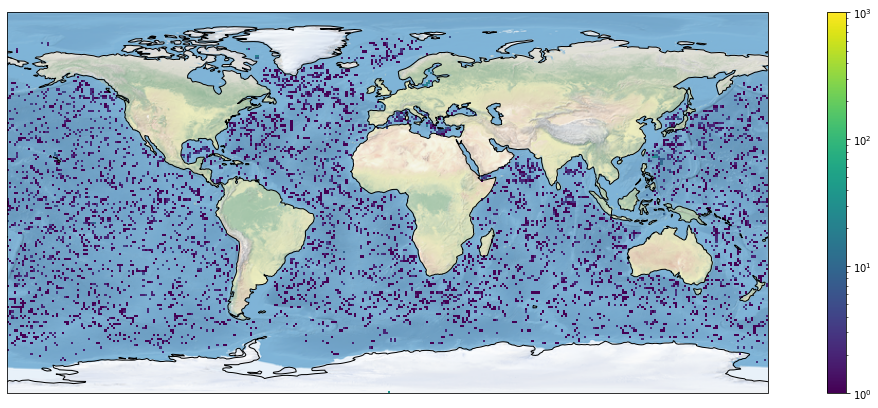

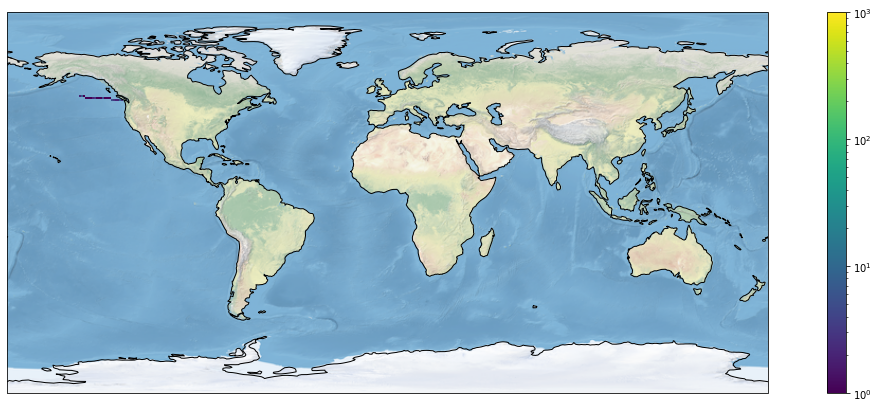

In [8]:
for name in ['df_argo','df_cchdo']: # ['df_tc','df_argo','df_cchdo','df_drifters']:
    if name not in globals():
        globals()[name] = pickle.load( open( fpath+name+startDate[0:10]+'_'+endDate[0:10]+'.pkl', "rb" ) )
    map_count_in_bins(name=name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
        

In [ ]:
# df_argo = pickle.load( open( fpath+"df_argo.pkl", "rb" ) )